# Credit Card Default Prediction Project

Based on the dataset UCI Machine Learning Repository : https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Original paper : Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.
/Users/Jurren/Desktop/DefaultCreditCardClients_yeh_2009.pdf

## Dataset Features
* ##### 30 000 data points
* ##### 24 attributes

## Import : Data and Libraries
### Library Imports

In [19]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import scipy.cluster.hierarchy as sch
sns.set_style("dark")
sns.set_context("paper")

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.pipeline import Pipeline
from sklearn import svm, metrics, preprocessing
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


### Import and pre-processing of dataset 
(preprocessing : transforming data into ML model readable format)

In [20]:
# assert pandas importable 
# %run Data_ImportAndExplore.ipynb

from Data_ImportAndExplore.ipynb import X_train, y_train, X_test, y_test

ModuleNotFoundError: No module named 'Data_ImportAndExplore'

Running this notebook gives the two dataframes : `df_train` and `df_test`
* The training dataframe is broken down into `X_train` and `y_train`, respectively the features dataframe and labels column of the training data <br> <br>
* The test dataframe is broken down similarly into `X_test` and `y_test`

In [3]:
df_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,24000.000000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000
mean,165495.986667,1.628250,1.847417,1.55725,35.380458,-0.003125,-0.12350,-0.154750,-0.211667,-0.252917,...,42368.188417,40000.682542,38563.710625,5542.912917,5.815336e+03,4969.26600,4743.480042,4783.486042,5189.399042,0.223750
std,129128.744855,0.483282,0.780007,0.52208,9.271050,1.123425,1.20058,1.204033,1.166549,1.136993,...,63070.680934,60345.012766,59155.759799,15068.576072,2.079703e+04,16095.61434,14883.269990,15270.405279,17630.371990,0.416765
min,10000.000000,1.000000,0.000000,0.00000,21.000000,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.00000,28.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,...,2340.000000,1740.000000,1234.750000,1000.000000,8.000000e+02,379.00000,279.750000,244.000000,60.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.00000,34.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,18940.500000,18107.500000,17036.000000,2100.000000,2.000000e+03,1702.50000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.00000,41.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,52188.500000,49746.500000,48796.250000,5000.000000,5.000000e+03,4347.25000,4000.000000,4005.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.00000,79.000000,8.000000,8.00000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.00000,497000.000000,417990.000000,528666.000000,1.000000


In [4]:
assert np.shape(y_train)[0] == np.shape(X_train)[0]

### Benchmarking some standard ML models

In [5]:
# %run Benchmarking.ipynb

In [6]:
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
import xgboost
xgb_clf = xgboost.XGBClassifier(eta=0.3, gamma=0.5, use_label_encoder=False)

method0 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', None)
])

In [7]:
X_train0 = method0.fit_transform(X_train)
X_train0 = pd.DataFrame(X_train0, columns=features)

In [8]:
xgb_clf.fit(X_train0,y_train)

[16:29:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0.5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [9]:
X_test1 = method0.transform(X_test)
X_test1 = pd.DataFrame(X_test1, columns=features)

In [10]:
y_predicted = xgb_clf.predict(X_test1)

In [11]:
np.mean(y_predicted==y_test)

0.8258333333333333

In [12]:
model = xgb_clf

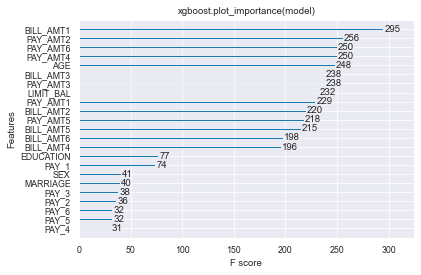

In [13]:
xgboost.plot_importance(model)
plt.title("xgboost.plot_importance(model)")
plt.show()

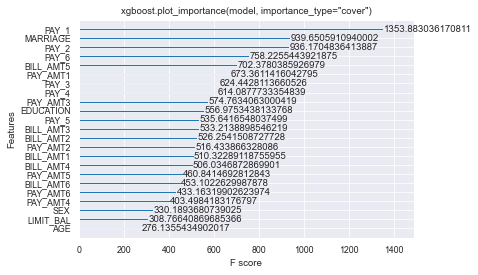

In [14]:
xgboost.plot_importance(model, importance_type="cover")
plt.title('xgboost.plot_importance(model, importance_type="cover")')
plt.show()

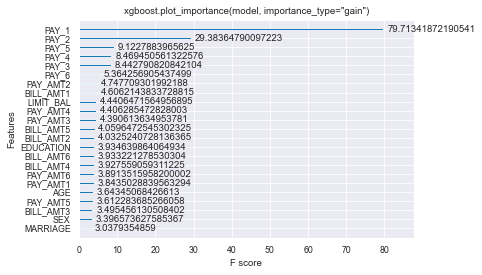

In [15]:
xgboost.plot_importance(model, importance_type="gain")
plt.title('xgboost.plot_importance(model, importance_type="gain")')
plt.show()

## Performance at given percentages
### robustness

As opposed to simply classifiying clients as expected to default vs not-expected to default, quantifying is more meaningful. I.e. defining a probability of default has more potential.

To estimate the real probability, the Smooth Sorting Method can be used, which estimates the real probability by looking at neighboring points and taking the mean of these values.

__Smooth Sorting Method__ from the original paper (Yeh, I. C., & Lien, C. H. (2009)): 

$$\text{P}_i = \frac{\sum_{j=-n}^{n}\text{Y}_{i-j}}{2n+1}$$

where $\text{P}_i$ is the estimated real probability of default, $\text{Y}_{i}$ is the binary variable of default (1) or non-default (0), $n$ is the number of data for smoothing.<br>
The Smooth Sorting Method is used on sorted data, from the lowest probability of default occuring to the highest probability of default occuring. 

This is interesting to look at because loaners adopt different risk strategies.    
(for this we 

we have the lists : `y_predicted` and `y_test`

In [16]:
xgb_reg = xgboost.XGBRegressor(eta=0.3, gamma=0.5, use_label_encoder=False)
xgb_reg.fit(X_train,y_train)
y_predicted = xgb_reg.predict(X_test)

In [17]:
y_predicted

array([0.6262005 , 0.12817512, 0.0177015 , ..., 0.66252387, 0.1133497 ,
       0.1693231 ], dtype=float32)

In [18]:
sorted_index = np.argsort(y_predicted)

y_test_sorted = y_test_numpy[sorted_index]

NameError: name 'y_test_numpy' is not defined

In [ ]:
y_test_sorted

In [ ]:
y_avg = []
n = 200
for counter in range(n,len(y_test_sorted)-n):
    intermediate_val = np.mean(y_test_sorted[counter-n:counter+n])
    y_avg.append(intermediate_val)
    
y_predicted_sorted = sorted(y_predicted[n:len(y_predicted)-n])

In [ ]:
plt.plot(y_avg)
plt.show()

In [ ]:
plt.plot(sorted(y_predicted[n:len(y_predicted)-n]),y_avg)
plt.grid(True)
plt.ylim([0,1])
plt.show()

In [ ]:
np.shape(y_predicted[n:len(y_predicted)-n])

In [ ]:
sorted(y_predicted)

In [ ]:
n

In [ ]:
y_predicted_selected = y_predicted[n:len(y_predicted)-n]

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_avg,y_predicted_selected))

In [ ]:
len(y_predicted)-n

### Explain predictions
Tree SHAP implementation integrated into xgboost

In [ ]:
import shap

In [ ]:
X = X_train


In [ ]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])


In [ ]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X.iloc[:1000,:])

In [ ]:
shap.summary_plot(shap_values,X)

In [ ]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X)

In [ ]:
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [ ]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}

In [ ]:
model_ind = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

In [ ]:
shap_values_ind = shap.TreeExplainer(model_ind).shap_values(X)

In [ ]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values_ind, X)

In [ ]:
X_display

In [ ]:
X

In [ ]:
sm = SMOTE(random_state=3)
X_train0, y_train = sm.fit_resample(X_train0,y_train)
# X_train0.describe()

In [ ]:
xgb_clf2 = xgboost.XGBClassifier(eta=0.1, gamma=0.5, use_label_encoder=False)
xgb_clf2.fit(X_train0,y_train)
y_predicted2 = xgb_clf2.predict(X_test)
np.mean(y_predicted2==y_test)

In [ ]:
X_train0.describe()